In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
data = pd.DataFrame()
for i in range(2010, 2019):
    tmp = pd.read_csv(f'../input/mlbplaybyplay2010s/all{i}.csv')
    tmp['YEAR'] = i
    data = data.append(tmp)
data = data.reset_index(drop=True)

Wall time: 1min 2s


In [4]:
data.columns

Index(['GAME_ID', 'AWAY_TEAM_ID', 'INN_CT', 'BAT_HOME_ID', 'OUTS_CT',
       'BALLS_CT', 'STRIKES_CT', 'PITCH_SEQ_TX', 'AWAY_SCORE_CT',
       'HOME_SCORE_CT', 'BAT_ID', 'BAT_HAND_CD', 'RESP_BAT_ID',
       'RESP_BAT_HAND_CD', 'PIT_ID', 'PIT_HAND_CD', 'RESP_PIT_ID',
       'RESP_PIT_HAND_CD', 'POS2_FLD_ID', 'POS3_FLD_ID', 'POS4_FLD_ID',
       'POS5_FLD_ID', 'POS6_FLD_ID', 'POS7_FLD_ID', 'POS8_FLD_ID',
       'POS9_FLD_ID', 'BASE1_RUN_ID', 'BASE2_RUN_ID', 'BASE3_RUN_ID',
       'EVENT_TX', 'LEADOFF_FL', 'PH_FL', 'BAT_FLD_CD', 'BAT_LINEUP_ID',
       'EVENT_CD', 'BAT_EVENT_FL', 'AB_FL', 'H_FL', 'SH_FL', 'SF_FL',
       'EVENT_OUTS_CT', 'DP_FL', 'TP_FL', 'RBI_CT', 'WP_FL', 'PB_FL', 'FLD_CD',
       'BATTEDBALL_CD', 'BUNT_FL', 'FOUL_FL', 'BATTEDBALL_LOC_TX', 'ERR_CT',
       'ERR1_FLD_CD', 'ERR1_CD', 'ERR2_FLD_CD', 'ERR2_CD', 'ERR3_FLD_CD',
       'ERR3_CD', 'BAT_DEST_ID', 'RUN1_DEST_ID', 'RUN2_DEST_ID',
       'RUN3_DEST_ID', 'BAT_PLAY_TX', 'RUN1_PLAY_TX', 'RUN2_PLAY_TX',
       'RUN3_PL

In [7]:
tmp = data[data['GAME_END_FL'] == 'T']
sum(tmp['AWAY_SCORE_CT'] == tmp['HOME_SCORE_CT']) / len(tmp)

0.07892811413938175

In [12]:
pd.options.display.max_columns = 100
tmp[tmp['AWAY_SCORE_CT'] == tmp['HOME_SCORE_CT']].head(60)

,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,BAT_ID,BAT_HAND_CD,RESP_BAT_ID,RESP_BAT_HAND_CD,PIT_ID,PIT_HAND_CD,RESP_PIT_ID,RESP_PIT_HAND_CD,POS2_FLD_ID,POS3_FLD_ID,POS4_FLD_ID,POS5_FLD_ID,POS6_FLD_ID,POS7_FLD_ID,POS8_FLD_ID,POS9_FLD_ID,BASE1_RUN_ID,BASE2_RUN_ID,BASE3_RUN_ID,EVENT_TX,LEADOFF_FL,PH_FL,BAT_FLD_CD,BAT_LINEUP_ID,EVENT_CD,BAT_EVENT_FL,AB_FL,H_FL,SH_FL,SF_FL,EVENT_OUTS_CT,DP_FL,TP_FL,RBI_CT,WP_FL,PB_FL,FLD_CD,BATTEDBALL_CD,BUNT_FL,FOUL_FL,BATTEDBALL_LOC_TX,ERR_CT,ERR1_FLD_CD,ERR1_CD,ERR2_FLD_CD,ERR2_CD,ERR3_FLD_CD,ERR3_CD,BAT_DEST_ID,RUN1_DEST_ID,RUN2_DEST_ID,RUN3_DEST_ID,BAT_PLAY_TX,RUN1_PLAY_TX,RUN2_PLAY_TX,RUN3_PLAY_TX,RUN1_SB_FL,RUN2_SB_FL,RUN3_SB_FL,RUN1_CS_FL,RUN2_CS_FL,RUN3_CS_FL,RUN1_PK_FL,RUN2_PK_FL,RUN3_PK_FL,RUN1_RESP_PIT_ID,RUN2_RESP_PIT_ID,RUN3_RESP_PIT_ID,GAME_NEW_FL,GAME_END_FL,PR_RUN1_FL,PR_RUN2_FL,PR_RUN3_FL,REMOVED_FOR_PR_RUN1_ID,REMOVED_FOR_PR_RUN2_ID,REMOVED_FOR_PR_RUN3_ID,REMOVED_FOR_PH_BAT_ID,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID,YEAR
467,ANA201004100,OAK,9,1,1,2,0,BBX,3,3,matsh001,L,matsh001,L,bresc001,L,bresc001,L,suzuk001,bartd001,ellim001,kouzk001,pennc001,buckt001,davir003,sweer001,huntt001,abreb001,NaN,S9/L.2-H;1-3,F,F,10,4,20,T,T,1,F,F,0,F,F,1,F,F,9,L,F,F,NaN,0,0,N,0,N,0,N,1,3,4,0,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,bresc001,bresc001,NaN,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,77,2010
1336,ANA201004280,CLE,9,1,2,0,0,.X,3,3,kendh001,R,kendh001,R,perec002,R,perec002,R,marsl001,branr001,valbl001,peraj001,cabra002,keara001,sizeg001,choos001,rivej001,NaN,huntt001,S4/BG.3-H;1-2,F,F,4,7,20,T,T,1,F,F,0,F,F,1,F,F,4,G,T,F,NaN,0,0,N,0,N,0,N,1,2,0,4,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,perer002,NaN,smitj002,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,74,2010
1433,ANA201005100,TBA,11,1,1,1,2,FB.SX,4,4,rivej001,R,rivej001,R,balfg001,R,balfg001,R,jasoj001,penac001,aybaw001,longe001,bartj001,crawc002,zobrb001,kaplg001,NaN,NaN,morak001,9/SF/F.3-H,F,F,7,6,2,T,F,0,F,T,1,F,F,1,F,F,9,F,F,F,NaN,0,0,N,0,N,0,N,0,0,0,4,9.0,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,NaN,NaN,balfg001,F,T,F,F,F,NaN,NaN,NaN,NaN,0,9,0,0,0,0,0,0,0,97,2010
2034,ANA201005260,TOR,9,1,2,2,2,BCFBX,5,5,abreb001,L,abreb001,L,downs001,L,downs001,L,molij001,overl001,hilla001,encae001,gonza002,reedj004,wellv001,bautj002,kendh001,aybae001,rivej001,S7/L.3-H;2-3;1-2,F,F,9,3,20,T,T,1,F,F,0,F,F,1,F,F,7,L,F,F,NaN,0,0,N,0,N,0,N,1,2,3,4,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,downs001,downs001,downs001,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,77,2010
2192,ANA201005290,SEA,10,1,1,0,0,X,1,1,morak001,L,morak001,L,leagb001,R,leagb001,R,johnr009,tuiam001,figgc001,lopej003,wilsj003,saunm001,gutif001,suzui001,willr004,abreb001,iztum001,HR/8/F.3-H;2-H(UR);1-H,F,F,3,5,23,T,T,4,F,F,0,F,F,4,F,F,0,F,F,F,8,0,0,N,0,N,0,N,4,4,5,4,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,leagb001,leagb001,leagb001,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,82,2010
4468,ANA201008110,KCA,10,1,1,1,1,CBX,1,1,abreb001,L,abreb001,L,chavj001,R,chavj001,R,penab002,kaaik001,avilm001,betew001,betay001,gorda001,maiem001,bloow001,NaN,NaN,NaN,HR/9/F,F,F,7,1,23,T,T,4,F,F,0,F,F,1,F,F,0,F,F,F,9,0,0,N,0,N,0,N,4,0,0,0,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,79,2010
5453,ANA201009080,CLE,16,1,1,0,0,X,3,3,mathj001,R,mathj001,R,ambrh001,R,ambrh001,R,marsl001,marta004,donaj002,valbl001,cabra002,crowt001,branm003,choos001,NaN,NaN,huntt001,9/SF/F.3-H,F,F,2,6,2,T,F,0,F,T,1,F,F,1,F,F,9,F,F,F,NaN,0,0,N,0,N,0,N,0,0,0,4,9.0,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,NaN,NaN,ambrh001,F,T,F,F,F,NaN,NaN,NaN,NaN,0,9,0,0,0,0,0,0,0,133,2010
5563,ANA201009100,SEA,14,1,1,0,0,X,3,3,abreb001,L,abreb001,L,sweeb001,R,sweeb001,R,moora001,tuiam001,figgc001,lopej003,wilsj003,saunm001,gutif001,suzui001,NaN,NaN,NaN,HR/8/F,F,F,7,2,23,T,T,4,F,F,0,F,F,1,F,F,0,F,F,F,8,0,0,N,0,N,0,N,4,0,0,0,NaN,NaN,NaN,NaN,F,F,F,F,F,F,F,F,F,NaN,NaN,NaN,F,T,F,F,F,NaN,NaN,NaN,NaN,0,0,0,0

In [3]:
single, double, triple, homerun = 20, 21, 22, 23
bb_hbp = [14, 15, 16]
strikeout = 3

In [4]:
bat_event_counts = data.groupby(['BAT_ID', 'YEAR'])['EVENT_CD'].value_counts()
pit_event_counts = data.groupby(['PIT_ID', 'YEAR'])['EVENT_CD'].value_counts()

In [5]:
%%time
bat_info = {}
for bat_id in bat_event_counts.index.get_level_values(0).unique():
    bat_info[bat_id] = {}
    for year in bat_event_counts[bat_id].index.get_level_values(0).unique():
        bat_info[bat_id][year] = {'pa': 0, 'single': 0, 'double': 0, 'triple': 0, 'homerun': 0, 'bb+hbp': 0, 'strikeout': 0}

        bat_info[bat_id][year]['pa'] = bat_event_counts[bat_id][year].sum()
        
        if single in bat_event_counts[bat_id][year].index:
            bat_info[bat_id][year]['single'] = bat_event_counts[bat_id][year][single].sum()
            
        if double in bat_event_counts[bat_id][year].index:
            bat_info[bat_id][year]['double'] = bat_event_counts[bat_id][year][double].sum()
            
        if triple in bat_event_counts[bat_id][year].index:
            bat_info[bat_id][year]['triple'] = bat_event_counts[bat_id][year][triple].sum()
            
        if homerun in bat_event_counts[bat_id][year].index:
            bat_info[bat_id][year]['homerun'] = bat_event_counts[bat_id][year][homerun].sum()
            
        if strikeout in bat_event_counts[bat_id][year].index:
            bat_info[bat_id][year]['strikeout'] = bat_event_counts[bat_id][year][strikeout].sum()
        
        existing_events = bat_event_counts[bat_id][year].index.intersection(bb_hbp)
        bat_info[bat_id][year]['bb+hbp'] = bat_event_counts[bat_id][year][existing_events].sum()

Wall time: 1min 34s


In [6]:
%%time
pit_info = {}
for pit_id in pit_event_counts.index.get_level_values(0).unique():
    pit_info[pit_id] = {}
    for year in pit_event_counts[pit_id].index.get_level_values(0).unique():
        pit_info[pit_id][year] = {'pa': 0, 'single': 0, 'double': 0, 'triple': 0, 'homerun': 0, 'bb+hbp': 0}
        
        pit_info[pit_id][year]['pa'] = pit_event_counts[pit_id][year].sum()
        
        if single in pit_event_counts[pit_id][year].index:
            pit_info[pit_id][year]['single'] = pit_event_counts[pit_id][year][single].sum()
            
        if double in pit_event_counts[pit_id][year].index:
            pit_info[pit_id][year]['double'] = pit_event_counts[pit_id][year][double].sum()
            
        if triple in pit_event_counts[pit_id][year].index:
            pit_info[pit_id][year]['triple'] = pit_event_counts[pit_id][year][triple].sum()
            
        if homerun in pit_event_counts[pit_id][year].index:
            pit_info[pit_id][year]['homerun'] = pit_event_counts[pit_id][year][homerun].sum()
            
        if strikeout in pit_event_counts[pit_id][year].index:
            pit_info[pit_id][year]['strikeout'] = pit_event_counts[pit_id][year][strikeout].sum()
        
        existing_events = pit_event_counts[pit_id][year].index.intersection(bb_hbp)
        pit_info[pit_id][year]['bb+hbp'] = pit_event_counts[pit_id][year][existing_events].sum()

Wall time: 1min 17s


In [7]:
%%time
bat_features = ['single/pa', '(double+triple)/pa', 'homerun/pa', '(bb+hbp)/pa', 'strikeout/pa']
pit_features = ['single/pa', '(double+triple)/pa', 'homerun/pa', '(bb+hbp)/pa', 'strikeout/pa']

data_dict = {}
data_dict[('is_home',)] = []
for i in range(9):
    for feature in bat_features:
        data_dict[(f'bat_{i+1}', feature)] = []
for feature in pit_features:
    data_dict[('starting_pit', feature)] = []
data_dict[('score',)] = []

game_end_indices = data.index[data['GAME_END_FL'] == 'T'].tolist()

start_index = 0
for end_index in game_end_indices:
    this_game = data.iloc[start_index:end_index+1]

    away_starting_bats = list(this_game['BAT_ID'][this_game['BAT_HOME_ID'] == 0].iloc[:9])
    home_starting_bats = list(this_game['BAT_ID'][this_game['BAT_HOME_ID'] == 1].iloc[:9])
    away_starting_pit = this_game['PIT_ID'][this_game['BAT_HOME_ID'] == 1].iloc[0]
    home_starting_pit = this_game['PIT_ID'][this_game['BAT_HOME_ID'] == 0].iloc[0]
    year = this_game.iloc[0]['YEAR']

    # away batters and home pitcher.
    data_dict[('is_home',)].append(0)
    for i in range(9):
        bat = away_starting_bats[i]
        pa = bat_info[bat][year]['pa']
        data_dict[(f'bat_{i+1}', 'single/pa')].append(bat_info[bat][year]['single'] / pa)
        data_dict[(f'bat_{i+1}', '(double+triple)/pa')].append(
            (bat_info[bat][year]['double'] + bat_info[bat][year]['triple']) / pa)
        data_dict[(f'bat_{i+1}', 'homerun/pa')].append(bat_info[bat][year]['homerun'] / pa)
        data_dict[(f'bat_{i+1}', '(bb+hbp)/pa')].append(bat_info[bat][year]['bb+hbp'] / pa)
        data_dict[(f'bat_{i+1}', 'strikeout/pa')].append(bat_info[bat][year]['strikeout'] / pa)
        # data_dict[(f'bat_{i+1}', 'pa')].append(pa)
    pit = home_starting_pit
    pa = pit_info[pit][year]['pa']
    data_dict[('starting_pit', 'single/pa')].append(pit_info[pit][year]['single'] / pa)
    data_dict[('starting_pit', '(double+triple)/pa')].append(
        (pit_info[pit][year]['double'] + pit_info[pit][year]['triple']) / pa)
    data_dict[('starting_pit', 'homerun/pa')].append(pit_info[pit][year]['homerun'] / pa)
    data_dict[('starting_pit', '(bb+hbp)/pa')].append(pit_info[pit][year]['bb+hbp'] / pa)
    data_dict[('starting_pit', 'strikeout/pa')].append(pit_info[pit][year]['bb+hbp'] / pa)
    # data_dict[('starting_pit', 'pa')].append(pa)
    data_dict[('score',)].append(this_game['AWAY_SCORE_CT'].iloc[-1])

    # home batters and away pitcher.
    data_dict[('is_home',)].append(1)
    for i in range(9):
        bat = home_starting_bats[i]
        pa = bat_info[bat][year]['pa']
        data_dict[(f'bat_{i+1}', 'single/pa')].append(bat_info[bat][year]['single'] / pa)
        data_dict[(f'bat_{i+1}', '(double+triple)/pa')].append(
            (bat_info[bat][year]['double'] + bat_info[bat][year]['triple']) / pa)
        data_dict[(f'bat_{i+1}', 'homerun/pa')].append(bat_info[bat][year]['homerun'] / pa)
        data_dict[(f'bat_{i+1}', '(bb+hbp)/pa')].append(bat_info[bat][year]['bb+hbp'] / pa)
        data_dict[(f'bat_{i+1}', 'strikeout/pa')].append(bat_info[bat][year]['strikeout'] / pa)
        # data_dict[(f'bat_{i+1}', 'pa')].append(pa)
    pit = away_starting_pit
    pa = pit_info[pit][year]['pa']
    data_dict[('starting_pit', 'single/pa')].append(pit_info[pit][year]['single'] / pa)
    data_dict[('starting_pit', '(double+triple)/pa')].append(
        (pit_info[pit][year]['double'] + pit_info[pit][year]['triple']) / pa)
    data_dict[('starting_pit', 'homerun/pa')].append(pit_info[pit][year]['homerun'] / pa)
    data_dict[('starting_pit', '(bb+hbp)/pa')].append(pit_info[pit][year]['bb+hbp'] / pa)
    data_dict[('starting_pit', 'strikeout/pa')].append(pit_info[pit][year]['bb+hbp'] / pa)
    # data_dict[('starting_pit', 'pa')].append(pa)
    data_dict[('score',)].append(this_game['HOME_SCORE_CT'].iloc[-1])
    
    start_index = end_index + 1

df = pd.DataFrame(data_dict)

Wall time: 1min 12s


In [8]:
df

is_home     bat_1                                            \
          NaN single/pa (double+triple)/pa homerun/pa (bb+hbp)/pa   
0           0  0.178918           0.047157   0.004161    0.088766   
1           1  0.180301           0.036728   0.008347    0.070117   
2           0  0.178918           0.047157   0.004161    0.088766   
3           1  0.180301           0.036728   0.008347    0.070117   
4           0  0.178918           0.047157   0.004161    0.088766   
...       ...       ...                ...        ...         ...   
43731       1  0.192000           0.050667   0.013333    0.130667   
43732       0  0.141176           0.041176   0.026471    0.058824   
43733       1  0.192000           0.050667   0.013333    0.130667   
43734       0  0.141176           0.041176   0.026471    0.058824   
43735       1  0.144928           0.057971   0.043478    0.086957   

                       bat_2                                            ...  \
      strikeout/pa single/pa (double+triple)/pa homerun/pa (bb+hbp)/pa  ...   
0         0.102635  0.166102           0.049153   0.010169    0.091525  ...   
1         0.135225  0.120863           0.060432   0.028777    0.128058  ...   
2         0.102635  0.166102           0.049153   0.010169    0.091525  ...   
3         0.135225  0.120863           0.060432   0.028777    0.128058  ...   
4         0.102635  0.166102           0.049153   0.010169    0.091525  ...   
...            ...       ...                ...        ...         ...  ...   
43731     0.170667  0.167320           0.043137   0.024837    0.096732  ...   
43732     0.197059  0.183333           0.024074   0.020370    0.061111  ...   
43733     0.170667  0.167320           0.043137   0.024837    0.096732  ...   
43734     0.197059  0.163504           0.055474   0.016058    0.113869  ...   
43735     0.173913  0.167320           0.043137   0.024837    0.096732  ...   

                   bat_9                                     starting_pit  \
      (double+triple)/pa homerun/pa (bb+hbp)/pa strikeout/pa    single/pa   
0               0.040404   0.003367    0.097643     0.168350     0.129649   
1               0.008065   0.016129    0.032258     0.286290     0.146703   
2               0.040404   0.003367    0.097643     0.168350     0.170330   
3               0.030435   0.013043    0.030435     0.256522     0.178470   
4               0.040404   0.003367    0.097643     0.168350     0.141575   
...                  ...        ...         ...          ...          ...   
43731           0.000000   0.000000    0.037736     0.226415     0.093333   
43732           0.018868   0.000000    0.037736     0.245283     0.097950   
43733           0.043659   0.014553    0.085239     0.170478     0.113924   
43734           0.018868   0.000000    0.037736     0.245283     0.055556   
43735           0.032468   0.012987    0.110390     0.181818     0.137221   

                                                             score  
      (double+triple)/pa homerun/pa (bb+hbp)/pa strikeout/pa   NaN  
0               0.044633   0.024442    0.057386     0.057386     3  
1               0.072678   0.030956    0.065949     0.065949     6  
2               0.057143   0.027473    0.075824     0.075824     5  
3               0.060907   0.035411    0.062323     0.062323     3  
4               0.051844   0.026919    0.084746     0.084746     4  
...                  ...        ...         ...          ...   ...  
43731           0.053333   0.020000    0.166667     0.166667     7  
43732           0.046697   0.026196    0.071754     0.071754     4  
43733           0.063291   0.025316    0.189873     0.189873     9  
43734           0.055556   0.055556    0.138889     0.138889     3  
43735           0.054889   0.032590    0.082333     0.082333     9  

[43736 rows x 52 columns]

In [9]:
np.std(df['score'])

NaN    3.068503
dtype: float64

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, df.drop('score', axis=1), df['score'], cv=5, scoring='neg_root_mean_squared_error')
print(scores)
np.mean(scores)

[-2.9425249  -2.88649956 -2.86637289 -2.95928829 -3.13202279]


-2.957341684008181

# XGBoost

In [11]:
%%time
import xgboost as xgb
dmatrix = xgb.DMatrix(data=df.drop('score', axis=1), label=df['score'])
params = {'objective': 'reg:squarederror',
          'learning_rate': 0.1,
          'gamma': 0.1,
          'max_depth': 3,
          'min_child_weight': 5,
          'subsample': 0.75,
          'colsample_bytree': 0.75}
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=100,
                    early_stopping_rounds=10,
                    metrics="rmse",
                    as_pandas=True,
                    seed=123)

Wall time: 20.9 s


In [12]:
cv_results.tail(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
90,2.918132,0.005222,2.975788,0.021013
91,2.917542,0.005248,2.975582,0.020857
92,2.916929,0.005283,2.975655,0.020758
93,2.916360,0.005211,2.975665,0.020763
94,2.915725,0.005149,2.975572,0.020704
95,2.915194,0.005111,2.975487,0.020850
96,2.914646,0.005143,2.975462,0.020831
97,2.914106,0.005215,2.975361,0.020674
98,2.913509,0.005215,2.975182,0.020863
99,2.912937,0.005187,2.975100,0.020869


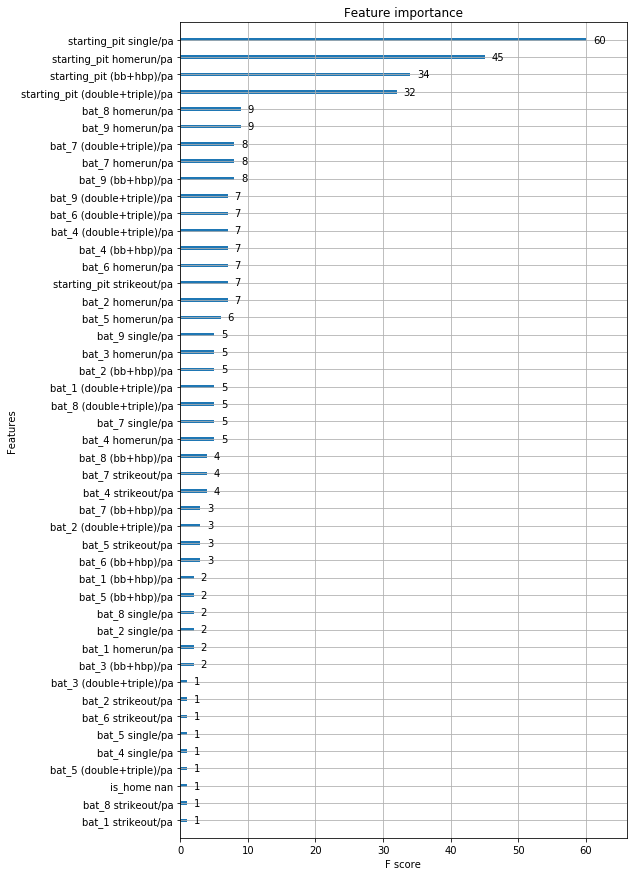

In [13]:
# Show feature importances.
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=50)
plt.rcParams["figure.figsize"] = (8, 15)
xgb.plot_importance(xg_reg)

In [15]:
pd.DataFrame([xg_reg.predict(dmatrix), dmatrix.get_label()])

,0,1,2,3,4,5,6,7,8,9,...,43726,43727,43728,43729,43730,43731,43732,43733,43734,43735
0,3.641199,4.479847,4.86045,4.70337,4.346556,4.097381,4.474286,4.219833,4.789549,3.874954,...,5.249684,4.893766,5.094798,4.370104,3.80091,4.339056,3.330588,5.328914,4.730956,4.986743
1,3.000000,6.000000,5.00000,3.00000,4.000000,2.000000,10.000000,1.000000,10.000000,4.000000,...,0.000000,6.000000,8.000000,6.000000,3.00000,7.000000,4.000000,9.000000,3.000000,9.000000


In [16]:
len(df.columns) - 1

51

# Win Prediction

In [41]:
lr.fit(df.drop('score', axis=1), df[('score', np.nan)])

predictions = lr.predict(df.drop('score', axis=1))
targets = df[('score', None)]
cnt = 0
total = 0

for i in range(0, df.shape[0], 2):
    if abs(predictions[i] - predictions[i+1]) == 0:
        win_prediction = 'draw'
    elif predictions[i] < predictions[i+1]:
        win_prediction = 'home'
    else:
        win_prediction = 'away'
        
    if targets[i] == targets[i+1]:
        result = 'draw'
    elif targets[i] < targets[i+1]:
        result = 'home'
        total += 1
    else:
        result = 'away'
        total += 1
        
    if win_prediction == result:
        cnt += 1

cnt / total

0.5997418329858009

In [39]:
pd.DataFrame([xg_reg.predict(dmatrix), df[('score', None)]]).T.head(60)

,0,1
0,3.641199,3.0
1,4.479847,6.0
2,4.860450,5.0
3,4.703370,3.0
4,4.346556,4.0
5,4.097381,2.0
6,4.474286,10.0
7,4.219833,1.0
8,4.789549,10.0
9,3.874954,4.0


In [17]:
for score in xg_reg.predict(dmatrix)
for i in range()

array([3.6411994, 4.4798474, 4.86045  , ..., 5.328914 , 4.7309556,
       4.986743 ], dtype=float32)

# Neural Network

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

In [58]:
keras.backend.clear_session()

# input layer
bat1 = keras.Input(shape=(5,), name='bat1')
bat2 = keras.Input(shape=(5,), name='bat2')
bat3 = keras.Input(shape=(5,), name='bat3')
bat4 = keras.Input(shape=(5,), name='bat4')
bat5 = keras.Input(shape=(5,), name='bat5')
bat6 = keras.Input(shape=(5,), name='bat6')
bat7 = keras.Input(shape=(5,), name='bat7')
bat8 = keras.Input(shape=(5,), name='bat8')
bat9 = keras.Input(shape=(5,), name='bat9')
pit1 = keras.Input(shape=(5,), name='pit1')  # starting pitcher

merged1 = layers.Concatenate()([bat1, pit1])
merged2 = layers.Concatenate()([bat2, pit1])
merged3 = layers.Concatenate()([bat3, pit1])
merged4 = layers.Concatenate()([bat4, pit1])
merged5 = layers.Concatenate()([bat5, pit1])
merged6 = layers.Concatenate()([bat6, pit1])
merged7 = layers.Concatenate()([bat7, pit1])
merged8 = layers.Concatenate()([bat8, pit1])
merged9 = layers.Concatenate()([bat9, pit1])

In [59]:
# dense 1, 2 layer
dense1 = layers.Dense(4, activation='relu')
dense2 = layers.Dense(4, activation='relu')

op1 = dense2(Dropout(rate=0.25)(dense1(merged1)))
op2 = dense2(Dropout(rate=0.25)(dense1(merged2)))
op3 = dense2(Dropout(rate=0.25)(dense1(merged3)))
op4 = dense2(Dropout(rate=0.25)(dense1(merged4)))
op5 = dense2(Dropout(rate=0.25)(dense1(merged5)))
op6 = dense2(Dropout(rate=0.25)(dense1(merged6)))
op7 = dense2(Dropout(rate=0.25)(dense1(merged7)))
op8 = dense2(Dropout(rate=0.25)(dense1(merged8)))
op9 = dense2(Dropout(rate=0.25)(dense1(merged9)))

concated = layers.Concatenate()([
    op1, op2, op3, op4, op5, op6, op7, op8, op9
])

concated = layers.BatchNormalization()(concated)

In [60]:
# dense 3 layer
dense3 = layers.Dense(12, activation='relu')

pp = Dropout(rate=0.25)(dense3(concated))

In [61]:
# dense 4 layer
dense4 = layers.Dense(6, activation='relu')

pp = dense4(pp)

In [62]:
# output layer
output = layers.Dense(1, activation=None)(pp)

In [63]:
model = keras.Model(inputs=[bat1, bat2, bat3, bat4, bat5, bat6, bat7, bat8, bat9, pit1], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bat1 (InputLayer)               [(None, 5)]          0                                            
__________________________________________________________________________________________________
pit1 (InputLayer)               [(None, 5)]          0                                            
__________________________________________________________________________________________________
bat2 (InputLayer)               [(None, 5)]          0                                            
__________________________________________________________________________________________________
bat3 (InputLayer)               [(None, 5)]          0                                            
______________________________________________________________________________________________

In [64]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['RootMeanSquaredError'])

In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [67]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_RootMeanSquaredError',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=1e-7)

In [68]:
history = model.fit([train['bat_1'],
                     train['bat_2'],
                     train['bat_3'],
                     train['bat_4'],
                     train['bat_5'],
                     train['bat_6'],
                     train['bat_7'],
                     train['bat_8'],
                     train['bat_9'],
                     train['starting_pit']],
                    train[('score',)],
                    batch_size=8,
                    epochs=50,
                    validation_data=(
                        [test['bat_1'],
                         test['bat_2'],
                         test['bat_3'],
                         test['bat_4'],
                         test['bat_5'],
                         test['bat_6'],
                         test['bat_7'],
                         test['bat_8'],
                         test['bat_9'],
                         test['starting_pit']],
                        test[('score',)]),
                   callbacks=[learning_rate_reduction])

Train on 34988 samples, validate on 8748 samples
Epoch 1/50
34988/34988 [==============================] - 33s 942us/sample - loss: 8.9654 - RootMeanSquaredError: 2.9942 - val_loss: 8.9760 - val_RootMeanSquaredError: 2.9960
Epoch 2/50
34988/34988 [==============================] - 37s 1ms/sample - loss: 8.9686 - RootMeanSquaredError: 2.9948 - val_loss: 9.0964 - val_RootMeanSquaredError: 3.0160
Epoch 3/50
34988/34988 [==============================] - 41s 1ms/sample - loss: 8.9556 - RootMeanSquaredError: 2.9926 - val_loss: 8.9703 - val_RootMeanSquaredError: 2.9951
Epoch 4/50
34988/34988 [==============================] - 38s 1ms/sample - loss: 8.9630 - RootMeanSquaredError: 2.9938 - val_loss: 12.1005 - val_RootMeanSquaredError: 3.4786
Epoch 5/50
34988/34988 [==============================] - 39s 1ms/sample - loss: 8.9573 - RootMeanSquaredError: 2.9929 - val_loss: 8.9293 - val_RootMeanSquaredError: 2.9882
Epoch 6/50
34988/34988 [==============================] - 40s 1ms/sample - loss: 8.

KeyboardInterrupt: 